In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnp-skin-chemicals-inventory/MNP Chemical List 2023 05 15 V2.xlsx
/kaggle/input/mnp-inventory/MNP Chemical List.xlsx


In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [49]:
# Load the Excel file into a DataFrame
data_df = pd.read_excel("/kaggle/input/mnp-inventory/MNP Chemical List.xlsx")

# Display the first few rows of the DataFrame to understand its structure
data_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Truskin C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Deionized Aqua (Water),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Organic Aloe Barbadensis Leaf (Aloe),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Sodium Ascorbyl Phosphate (Vitamin C),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Check a larger portion of the data to find where the actual data might begin
data_df.dropna(how='all', axis=1).dropna(how='all', axis=0).head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 34,Unnamed: 35,Unnamed: 36
1,NaN,NaN,NaN,NaN,NaN,NaN,Truskin C,NaN,NaN,NaN,...,Skin Cuticles C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Deionized Aqua (Water),NaN,NaN,NaN,...,Aqua/Water/Eau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Organic Aloe Barbadensis Leaf (Aloe),NaN,NaN,NaN,...,Ethoxydiglycol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Sodium Ascorbyl Phosphate (Vitamin C),NaN,NaN,NaN,...,Ascorbic Acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,MSM (Methylsulfonylmethane),NaN,NaN,NaN,...,Glycerin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,Botanical Hyaluronic Acid (Cassia Angustifolia...,NaN,NaN,NaN,...,Propylene Glycol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Witch Hazel (Hamamelis Virginiana),NaN,NaN,NaN,...,Laureth-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,Vitamin E (d-alpha Tocopheryl Acetate),NaN,NaN,NaN,...,Phenoxyethanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,Kosher Vegetable Glycerol,NaN,NaN,NaN,...,Tocopherol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,Carbome,NaN,NaN,NaN,...,Triethanolamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Reshape the data using concat() instead of append() <- recently deprecated

dataframes_to_concat = []  # List to store individual DataFrames for each inventory

# Iterate through each column in the original data to reshape
for col in data_df.columns:
    inventory_name = data_df[col].iloc[1]  # Assuming the second row contains the inventory name
    if pd.notna(inventory_name):  # If the inventory name is not NaN
        chemicals = data_df[col].iloc[2:].dropna()  # Get the list of chemicals for this inventory, dropping NaN values
        temp_df = pd.DataFrame({
            "InventoryName": [inventory_name] * len(chemicals),
            "ChemicalName": chemicals
        })
        dataframes_to_concat.append(temp_df)

# Concatenate all the DataFrames in the list
reshaped_data_concat = pd.concat(dataframes_to_concat, ignore_index=True)

# Display the reshaped data
reshaped_data_concat.head()


,InventoryName,ChemicalName
0,Truskin C,Deionized Aqua (Water)
1,Truskin C,Organic Aloe Barbadensis Leaf (Aloe)
2,Truskin C,Sodium Ascorbyl Phosphate (Vitamin C)
3,Truskin C,MSM (Methylsulfonylmethane)
4,Truskin C,Botanical Hyaluronic Acid (Cassia Angustifolia...


In [52]:
import sqlite3

In [53]:
# Step 1: Connect to a SQLite database (this will create a new one if it doesn't exist)
conn = sqlite3.connect('/kaggle/input/mnp-inventory/MNP Chemical List.xlsx')
cursor = conn.cursor()

In [54]:
import sqlite3
import pandas as pd

# Connect to a SQLite database (this will create a new one if it doesn't exist)
conn = sqlite3.connect('/kaggle/working/chemical_inventory.db')
cursor = conn.cursor()

# Create the ChemicalInventory table
cursor.execute('''
CREATE TABLE IF NOT EXISTS ChemicalInventory (
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    InventoryName TEXT NOT NULL,
    ChemicalName TEXT NOT NULL
)
''')

# (Assuming you've loaded your reshaped data into a DataFrame called reshaped_data_concat)
for index, row in reshaped_data_concat.iterrows():
    cursor.execute("INSERT INTO ChemicalInventory (InventoryName, ChemicalName) VALUES (?, ?)", (row['InventoryName'], row['ChemicalName']))

# Commit the transactions and close the connection
conn.commit()
conn.close()

print("Table created and data inserted successfully.")



Table created and data inserted successfully.


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [60]:
# Placeholder code to demonstrate SQL query execution in a Kaggle notebook

def execute_sql_query(query):
    # Connect to the SQLite database
    conn = sqlite3.connect('/kaggle/working/chemical_inventory.db')
    cursor = conn.cursor()

    # Execute the SQL query
    cursor.execute(query)

    # Fetch the results and convert to a DataFrame
    columns = [desc[0] for desc in cursor.description]
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)

    # Close the connection
    conn.close()
    
    return df

# 1. Count the number of chemicals in each inventory
query1 = """
SELECT InventoryName, COUNT(*) as NumberOfChemicals
FROM ChemicalInventory
GROUP BY InventoryName;
"""
df1 = execute_sql_query(query1)

# 2. Find the top 5 most common chemicals across all inventories
query2 = """
SELECT ChemicalName, COUNT(DISTINCT InventoryName) as NumberOfInventories
FROM ChemicalInventory
GROUP BY ChemicalName
ORDER BY NumberOfInventories DESC
LIMIT 5;
"""
df2 = execute_sql_query(query2)

# 3. List all chemicals present in a specific inventory (e.g., "Truskin C")
query3 = """
SELECT ChemicalName
FROM ChemicalInventory
WHERE InventoryName = 'Truskin C';
"""
df3 = execute_sql_query(query3)

df1, df2, df3  # Displaying the results of the three queries

(     InventoryName  NumberOfChemicals
 0    Dr. Brenner C                 24
 1  Skin Cuticles C                 26
 2        Truskin C                164,
              ChemicalName  NumberOfInventories
 0         Triethanolamine                    3
 1              Laureth-23                    3
 2            Ferulic Acid                    3
 3          Ethoxydiglycol                    3
 4  Tocopherol (Vitamin E)                    2,
                                           ChemicalName
 0                               Deionized Aqua (Water)
 1                 Organic Aloe Barbadensis Leaf (Aloe)
 2                Sodium Ascorbyl Phosphate (Vitamin C)
 3                          MSM (Methylsulfonylmethane)
 4    Botanical Hyaluronic Acid (Cassia Angustifolia...
 ..                                                 ...
 159                               Fragrance/ VS Desire
 160                               Fragrance/ VS Desire
 161                               Fragrance/ VS D

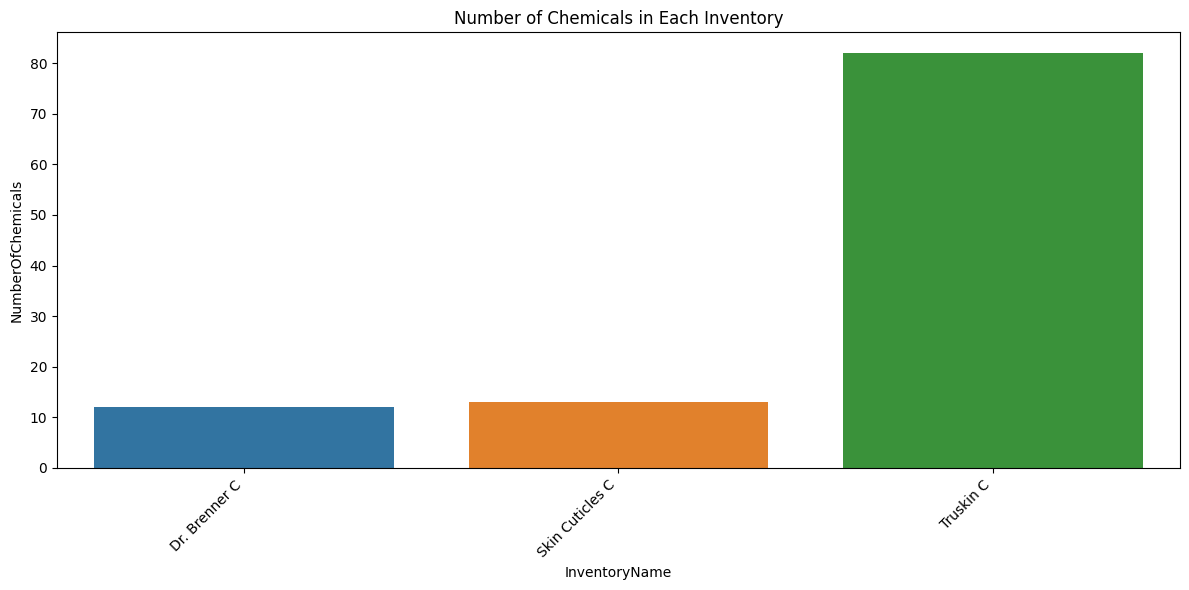

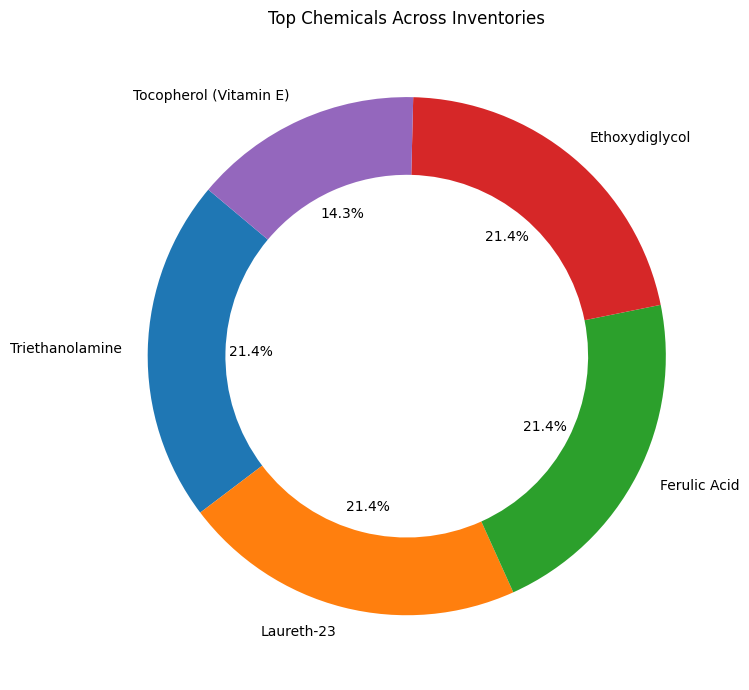

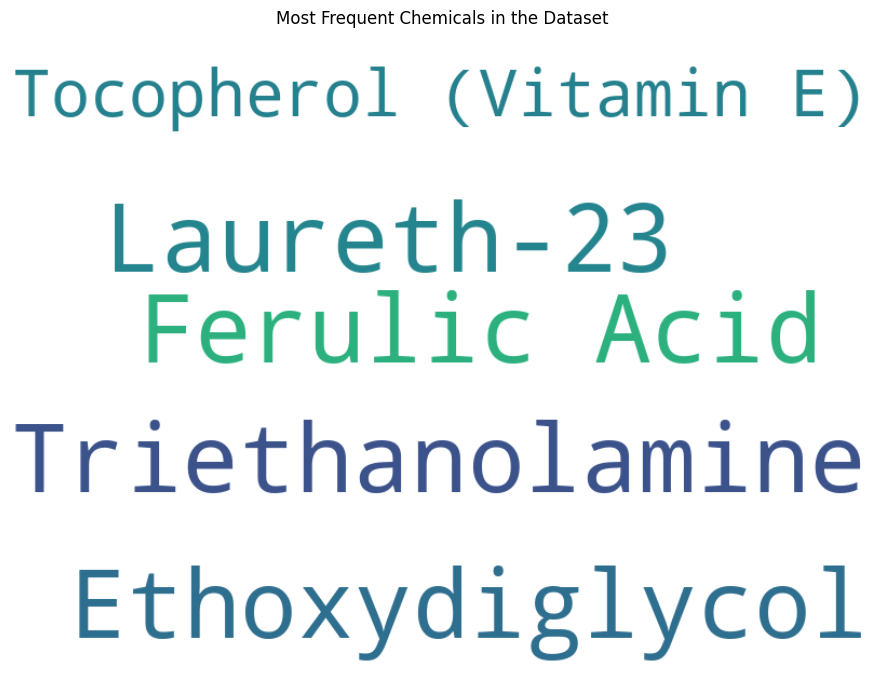

In [63]:
# Redefining the SQL queries

# 1. Count the number of chemicals in each inventory
query1 = """
SELECT InventoryName, COUNT(*) as NumberOfChemicals
FROM ChemicalInventory
GROUP BY InventoryName;
"""

# 2. Find the top 5 most common chemicals across all inventories
query2 = """
SELECT ChemicalName, COUNT(DISTINCT InventoryName) as NumberOfInventories
FROM ChemicalInventory
GROUP BY ChemicalName
ORDER BY NumberOfInventories DESC
LIMIT 5;
"""

# Reconnect to the SQLite database to fetch the required data
conn = sqlite3.connect('/kaggle/input/sql-database/chemical_inventory.db')

# Execute the SQL queries to fetch the data
df1 = pd.read_sql_query(query1, conn)
df2 = pd.read_sql_query(query2, conn)

# Close the connection
conn.close()

# Visualization 1: Bar Chart for number of chemicals in each inventory
plt.figure(figsize=(12, 6))
sns.barplot(x=df1['InventoryName'], y=df1['NumberOfChemicals'])
plt.title('Number of Chemicals in Each Inventory')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Pie Chart for the top chemicals across inventories
top_chemicals = df2.head(10)
plt.figure(figsize=(10, 7))
plt.pie(top_chemicals['NumberOfInventories'], labels=top_chemicals['ChemicalName'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Top Chemicals Across Inventories')
plt.tight_layout()
plt.show()

# Visualization 3: Word Cloud for most frequent chemicals
wordcloud = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(df2.set_index('ChemicalName')['NumberOfInventories'])
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Chemicals in the Dataset')
plt.axis('off')
plt.tight_layout()
plt.show()
